<h4><center><font color="1F4690">PJJ TEKNIK AUDIT BERBANTUAN KOMPUTER <br> <br> Selasa, 30 Mei 2023</font></center></h4>
<div class="alert alert-info"><h1 align="center"><font color="1F4690">DASAR-DASAR SQL QUERY</font></h4></div> 

# 1. Menampilkan Data Dari Tabel (SELECT)
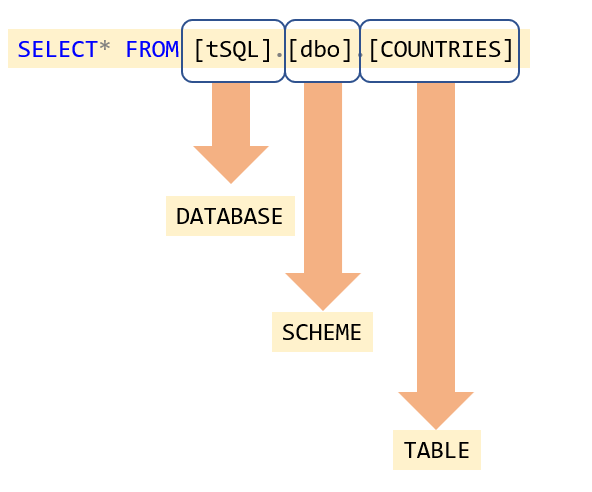

**Bagaimana memahami perintah `SELECT` tersebut ?**

- ### Tanda asterisk berarti kita meminta **untuk menampilkan seluruh kolom** yang terdapat pada \`\[tSQL\].\[dbo\].\[COUNTRIES\]\`
    
- `[tSQL]` merupakan database tempat data kita berada
    
- `[SCHEME]` merupakan skema akses data
    
- `[COUNTRIES]` merupakan nama tabel

Sebelum, masuk lebih dalam ke perintah tersebut, mari pahami ketiga hal tersebut. 
* Apabila anda melihat pada panel kiri dari SSMS anda, anda akan melihat banyak database-database yang tersimpan dalam satu server.
* Server yang sedang anda akses adalah `10.100.179.102` dengan port `1433`
* Anda sedang mengakses database dengan user `konektabksql`
* Nama database tidak boleh mengandung spasi.

 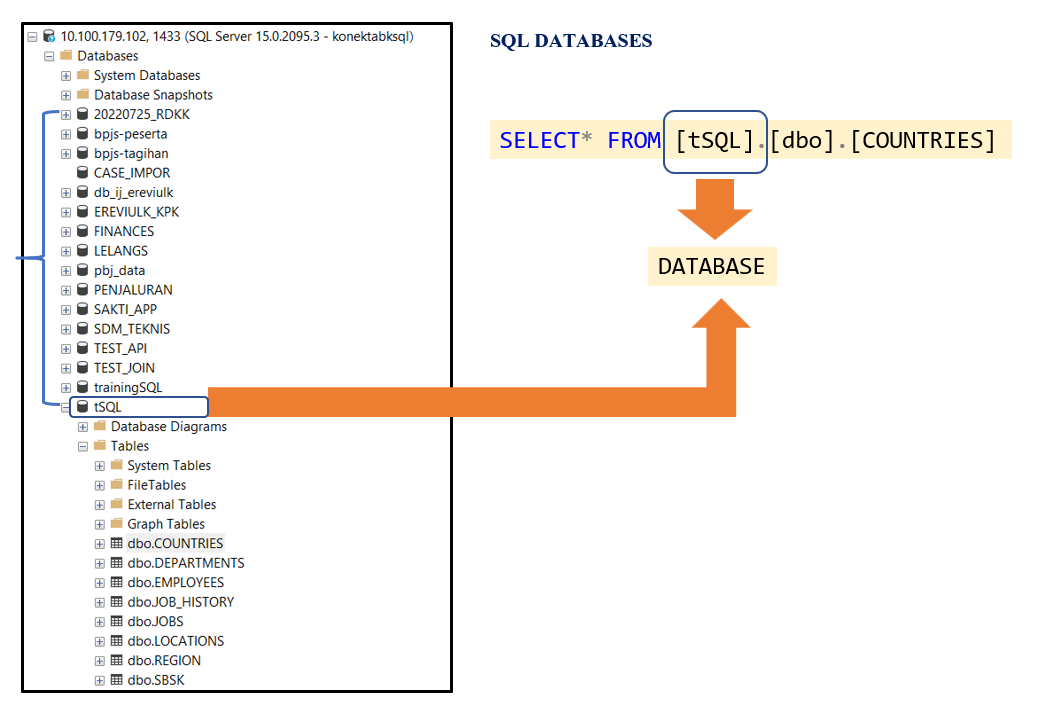

Kemudian, bagaimana dengan `SCHEMA`? 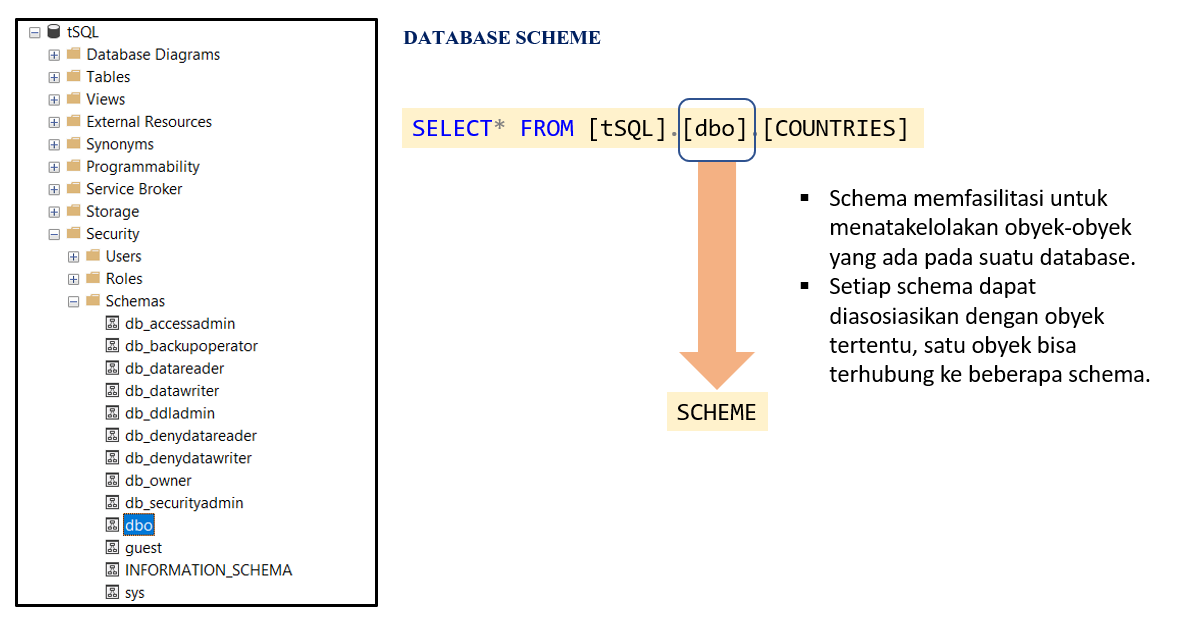

Manfaat dari skema antara lain :

* Schema dapat memberikan pembatasan terhadap apa saja yang bisa dilihat oleh user tertentu. Setiap user yang masuk ke server memiliki tampilan yang berbeda-beda sesuai dengan hak aksesnya.
* Cobalah klik pada database `LELANGS` apakah anda bisa mengakses database tersebut?
* Contoh obyek-obyek yang terdapat dalam suatu database (akses dan pengaturan terhadap obyek-obyek ini dikelola oleh `SCHEMA`).

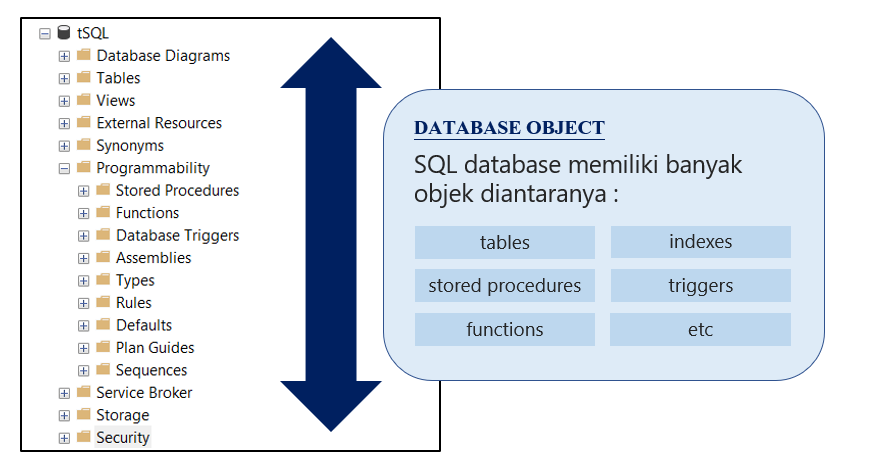

Di dalam suatu database, terdapat banyak tabel.

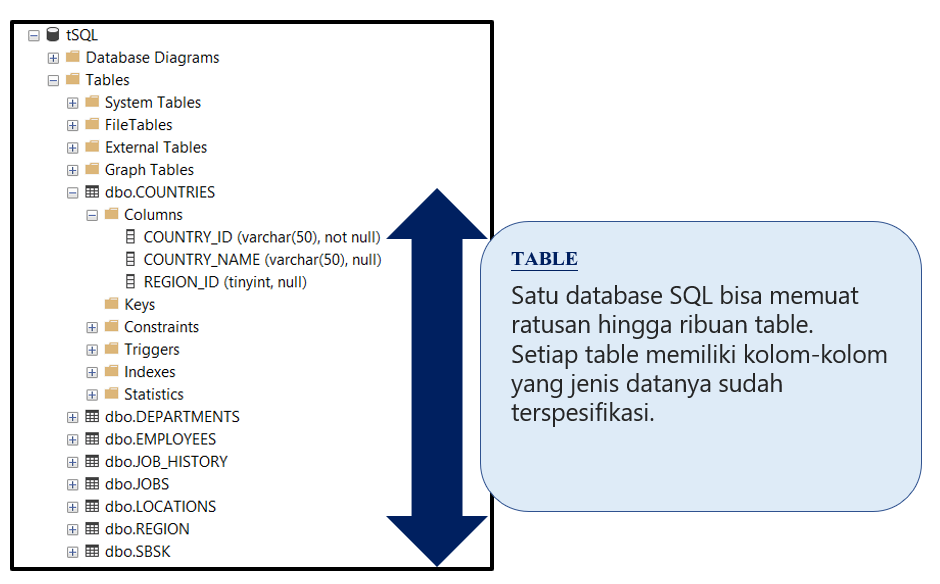

# 1.1 Memilih Database Instance

* Pada umumnya, seorang auditor akan terkoneksi pada satu database saja. 
* Di dalam database ini, sudah tersedia banyak tabel atau view yang datanya dapat diolah dalam rangka pengujian efektivitas atau pengujian substantif.
* Oleh karena itu, biasanya daripada memanggil nama database di setiap baris perintah, kita bisa menspesifikasi saja di awal dengan perintah `USE`.

In [17]:
USE TSQL

Commands completed successfully.

Total execution time: 00:00:00.016

Setelah, menspesifikai hal tersebut, anda dapat langsung memanggil data dengan menggunakan nama schema dan nama tabel.

Perhatikan bahwa jika nama tabel memiliki spasi antara kata, maka nama tabel tersebut harus diapit oleh kurung kurawal buka dan kurung kurawal tutup.

In [2]:
SELECT*FROM REGION

(4 rows affected)

Total execution time: 00:00:00.038

REGION_ID REGION_NAME 1 Europe 3 Asia 2 Americas 4 Middle East and Africa

# 2. Membatasi Data yang Tampil

## 2.1. Membatasi Jumlah Baris Data yang Tampil

Ketika auditor dihadapkan pada satu tabel dengan jumlah row yang banyak, misalkan 1000, 100.000, atau bahkan sejuta baris, maka sangat tidak efisien untuk meminta sistem menampilkan seluruh data tersebut. Auditor biasanya lebih cendrung ingin melihat sampel data atau struktur data.

Untuk membatasi jumlah row yang tampil, anda bisa menggunakan perintah  :

- `TOP` atau 
- `OFFSET FETCH` (akan dibahas setelah pembahasan `ORDER BY`)

(Catatan: Pada tutorial-tutorial di internet anda mungkin melihat `LIMIT` atau `OFFSET` untuk membatasi jumlah baris yang tampil, perlu diingat bahwa dua operator tersebut tidak dapat digunakan di SQL server. Limit merupakan perintah di MySQL, sedangkan OFFSET merupakan perintah di ORACLE).

In [3]:
-- Membatasi Jumlah Data yang Tampil
SELECT TOP 7* FROM dbo.EMPLOYEES

(7 rows affected)

Total execution time: 00:00:00.030

EMPLOYEE_ID FIRST_NAME LAST_NAME EMAIL PHONE_NUMBER HIRE_DATE JOB_ID SALARY COMMISSION_PCT MANAGER_ID DEPARTMENT_ID 100 Steven King SKING 5151234567 2003-06-17 AD_PRES 24000 NULL NULL 90 101 Neena Kochhar NKOCHHAR 5151234568 2005-09-21 AD_VP 17000 NULL 100 90 102 Lex De Haan LDEHAAN 5151234569 2001-01-13 AD_VP 17000 NULL 100 90 103 Alexander Hunold AHUNOLD 5904234567 2006-01-03 IT_PROG 9000 NULL 102 60 104 Bruce Ernst BERNST 5904234568 2007-05-21 IT_PROG 6000 NULL 103 60 105 David Austin DAUSTIN 5904234569 2005-06-25 IT_PROG 4800 NULL 103 60 106 Valli Pataballa VPATABAL 5904234560 2006-02-05 DB_ADMIN 4800 NULL 103 60

## 2.2 Membatasi Jumlah Kolom yang Tampil

- Untuk membatasi jumlah kolom yang tampil, anda hanya perlu menguraikan nama-nama kolom yang anda butuhkan.
- Ingat, ketika pembatasan kolom digunakan tanda asterisk tidak boleh digunakan lagi.

In [5]:
-- Membatasi Jumlah Data yang Tampil
SELECT TOP 5 EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM EMPLOYEES

(5 rows affected)

Total execution time: 00:00:00.016

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 100 Steven King 24000 101 Neena Kochhar 17000 102 Lex De Haan 17000 103 Alexander Hunold 9000 104 Bruce Ernst 6000

## 2.3 Membatasi Data yang Perlu Tampil dengan Spesifikasi Kriteria

- Sewaktu akan membatasi data yang perlu ditimapilkan melalui spesifikasi kriteria tertentu, auditor perlu untuk menggunakan klausa `WHERE`.
- Klausa `WHERE` sudah pasti akan menggunakan operator-operator tertentu misalnya
    - Operator perbandingan (`WHERE SALARY=17000`) atau (`WHERE SALARY>20000`)
    - Operator logika (`WHERE SALARY>20000` AND LAST\_NAME='KING')
    - Operator aritmatika (`WHERE SALARY*5/100>20000`)

In [6]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE SALARY>=10000

(20 rows affected)

Total execution time: 00:00:00.025

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 100 Steven King 24000 101 Neena Kochhar 17000 102 Lex De Haan 17000 108 Nancy Greenberg 12008 114 Den Raphaely 11000 130 Mozhe Atkinson 99000 145 John Russell 14000 146 Karen Partners 13500 147 Alberto Errazuriz 12000 148 Gerald Cambrault 11000 149 Eleni Zlotkey 10500 150 Peter Tucker 10000 156 Janette King 10000 162 Clara Vishney 10500 168 Lisa Ozer 11500 169 Harrison Bloom 10000 174 Ellen Abel 11000 201 Michael Hartstein 13000 204 Hermann Baer 10000 205 Shelley Higgins 12008

The general rule for evaluating multiple logic operators in SQL is based on the concept of operator precedence and the use of parentheses to control the evaluation order. Here are the general rules:

* Parentheses: You can use parentheses to group conditions and control their evaluation order. Conditions within parentheses are evaluated first.
* Logical AND operator (AND): The AND operator has higher precedence than the OR operator. If both AND and OR operators are used in a single condition, the AND operator is evaluated first.

Commands completed successfully.

Total execution time: 00:00:00

## 2.4 Membatasi Dengan Parameter Kriteria Berada pada Suatu Rentang Tertentu

Untuk membatasi kriteria pada suatu rentang tertentu gunakan `BETWEEN` atau `IN`. Misalkan:

- yang gajinya diantara `10000-15000` bisa ditampilkan dengan `WHERE SALARY BETWEEN 10000 AND 15000`
- yang gajinya `10000`, `20000`, `30000` bisa ditampilkan dengan `WHERE SALARY IN (10000,15000)`

In [23]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE SALARY BETWEEN 10000 AND 15000

(16 rows affected)

Total execution time: 00:00:00.035

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 108 Nancy Greenberg 12008 114 Den Raphaely 11000 145 John Russell 14000 146 Karen Partners 13500 147 Alberto Errazuriz 12000 148 Gerald Cambrault 11000 149 Eleni Zlotkey 10500 150 Peter Tucker 10000 156 Janette King 10000 162 Clara Vishney 10500 168 Lisa Ozer 11500 169 Harrison Bloom 10000 174 Ellen Abel 11000 201 Michael Hartstein 13000 204 Hermann Baer 10000 205 Shelley Higgins 12008

In [24]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE SALARY IN (10000,12000)

(5 rows affected)

Total execution time: 00:00:00.013

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 147 Alberto Errazuriz 12000 150 Peter Tucker 10000 156 Janette King 10000 169 Harrison Bloom 10000 204 Hermann Baer 10000

## 2.5 Membatasi Dengan Parameter Kriteria Karakter `VARCHAR`

- Apabila tipe data pada kolom yang anda ingin batasi berupa karakter, anda harus menggunakan ` `` ` pada kata yang ingin anda cari misalkan `LAST_NAME=`KING
- Perlu hati-hati karena queri yang tidak tepat bisa menghasilkan kesimpulan yang salah.
- Pembatasan berupa `LAST_NAME=`KING berarti hanya menampilkan baris yang last namenya berupa `KING`
- Last name berupa `KINGKONG`, `ACKING`, `AKINGKONG` tidak akan muncul pada hasil queri.

In [25]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE SALARY>10000 AND LAST_NAME='KING'

(1 row affected)

Total execution time: 00:00:00.017

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 100 Steven King 24000

Bila anda ingin mencari kata yang mengandung dari depan, gunakan tanda ampersand  `% %` di depan, di belakang, atau keduanya.
Misalkan :
* Pegawai yang nama akhirnya mengandung karakter `Jo` di bagian depan kata `WHERE LAST_NAME LIKE 'Jo%'`
* Pegawai yang nama akhirnya mengandung karakter `nes` di bagian depan kata `WHERE LAST_NAME LIKE '%nes'`
* Pegawai yang nama akhirnya mengandung karakter `one` di bagian depan kata `WHERE LAST_NAME LIKE '%on%'`

In [26]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE LAST_NAME LIKE 'Jo%'

(2 rows affected)

Total execution time: 00:00:00.012

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 179 Charles Johnson 6200 195 Vance Jones 2800

In [27]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE LAST_NAME LIKE '%nes'

(1 row affected)

Total execution time: 00:00:00.015

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 195 Vance Jones 2800

In [7]:
SELECT EMPLOYEE_ID, FIRST_NAME, LAST_NAME, SALARY FROM dbo.EMPLOYEES WHERE FIRST_NAME LIKE '%on%' OR LAST_NAME LIKE '%on%'

(13 rows affected)

Total execution time: 00:00:00.017

EMPLOYEE_ID FIRST_NAME LAST_NAME SALARY 130 Mozhe Atkinson 99000 132 TJ Olson 2100 133 Jason Mallin 3300 169 Harrison Bloom 10000 175 Alyssa Hutton 8800 176 Jonathon Taylor 8600 177 Jack Livingston 8400 179 Charles Johnson 6200 180 Winston Taylor 3200 183 Girard Geoni 2800 187 Anthony Cabrio 3000 195 Vance Jones 2800 198 Donald OConnell 2600

## 2.6. Menemukan Data Numerik pada Suatu Kolom

Regex `[0-9]`

In [8]:
WITH products AS (
  SELECT 'abc123' AS name, '1234567890' AS phone_number, 'this is a test' AS description
  UNION ALL
  SELECT 'def456', '9876543210', 'this is another test'
  UNION ALL
  SELECT 'ghi789', '0123456789', 'this is one more test'
  UNION ALL
  SELECT 'abc', 'def', 'this is one more test'
    UNION ALL
  SELECT '^&(tiga)', 'gelas', 'this is one more test'
)

SELECT *
FROM products



(5 rows affected)

Total execution time: 00:00:00.033

name phone_number description abc123 1234567890 this is a test def456 9876543210 this is another test ghi789 0123456789 this is one more test abc def this is one more test ^&(tiga) gelas this is one more test

In [11]:
WITH products AS (
  SELECT 'abc123' AS name, '1234567890' AS phone_number, 'this is a test' AS description
  UNION ALL
  SELECT 'def456', '9876543210', 'this is another test'
  UNION ALL
  SELECT 'ghi789', '0123456789', 'this is one more test'
  UNION ALL
  SELECT 'abc', 'def', 'this is one more test'
    UNION ALL
  SELECT '^&(tiga)', 'gelas', 'this is one more test'
)


SELECT *
FROM products WHERE phone_number NOT LIKE '%[0-9]%'

(2 rows affected)

Total execution time: 00:00:00.025

name phone_number description abc def this is one more test ^&(tiga) gelas this is one more test

## 2.7 Menemukan <span style="color: rgb(0, 0, 255);">Data</span> Alfanumerik pada Suatu Kolom

  

Regex <span style="color: #a31515;">`[a-zA-Z0-9]`</span>

In [19]:
WITH products AS (
  SELECT 'abc123' AS name, '1234567890' AS phone_number, 'this is a test' AS description
  UNION ALL
  SELECT 'def456', '9876543210', 'this is another test'
  UNION ALL
  SELECT 'ghi789', '0123456789', 'this is one more test'
  UNION ALL
  SELECT 'abc', 'def', 'this is one more test'
    UNION ALL
  SELECT '^&(tiga)', 'gelas', 'this is one more test'
)
SELECT *
FROM products WHERE name NOT LIKE '[%a-zA-Z0-9]%'

(1 row affected)

Total execution time: 00:00:00.023

name phone_number description ^&(tiga) gelas this is one more test

## 2.6 Menampilkan Data Unik

Sewaktu melakukan observasi data, auditor seringkali membutuhkan data unik dari sejumlah data yang berulang, misalnya

- auditor perlu memastikan range waktu data dari kolom `tanggal transaksi`,
- jenis bantuan sosial yang terdapat dalam tabel pada kolom `jenis bantuan`,
- daerah penerima bantuan dari kolom `provinsi`

Untuk itu, auditor perlu menggunakan sintaks `DISTINCT`

In [29]:
SELECT DISTINCT JOB_ID FROM dbo.EMPLOYEES

(20 rows affected)

Total execution time: 00:00:00.073

JOB_ID AC_ACCOUNT AC_MGR AD_ASST AD_PRES AD_VP DB_ADMIN FI_ACCOUNT FI_MGR HR_REP IT_PROG MK_MAN MK_REP PR_REP PU_CLERK PU_MAN SA_MAN SA_REP SH_CLERK ST_CLERK ST_MAN

In [22]:
SELECT DISTINCT  JOB_ID, DEPARTMENT_ID FROM EMPLOYEES

(21 rows affected)

Total execution time: 00:00:00.032

JOB_ID DEPARTMENT_ID AC_ACCOUNT 110 AC_MGR 110 AD_ASST 10 AD_PRES 90 AD_VP 90 DB_ADMIN 60 FI_ACCOUNT 100 FI_MGR 100 HR_REP 40 IT_PROG 60 MK_MAN 20 MK_REP 20 PR_REP 70 PU_CLERK 30 PU_MAN 30 SA_MAN 80 SA_REP NULL SA_REP 80 SH_CLERK 50 ST_CLERK 50 ST_MAN 50

## Beberapa Hal Tentang DISTINCT

1. DISTINCT can be used with multiple columns: You can use the SELECT DISTINCT statement with multiple columns to retrieve unique combinations of values across those columns. This is useful when you want to identify distinct combinations of values rather than just individual distinct values.
    
2. DISTINCT can impact query performance: Using SELECT DISTINCT can have an impact on query performance, especially when working with large datasets or complex queries. It requires additional processing to identify and eliminate duplicates, which can increase the query execution time.
    
3. DISTINCT does not guarantee a specific order: The SELECT DISTINCT statement does not guarantee any specific order for the result set. The order of the rows returned may vary, and you should not rely on the order of the distinct values unless you use an ORDER BY clause.
    
4. DISTINCT can be used with other clauses: You can combine the SELECT DISTINCT statement with other clauses like WHERE, ORDER BY, GROUP BY, and HAVING to further refine your query results based on specific conditions and sorting requirements.

## 3.2. Menemukan `NULL` Value pada Data

Nilai `NULL` menunjukkan ketiadaan data, `NULL` tidak sama dengan `0.`

- Untuk menemukan data yang null gunakan `IS NULL` 
- Untuk menampilkan data yang tidak null gunakan `IS NOT NULL`

In [1]:
USE tSQL
SELECT *FROM EMPLOYEES WHERE COMMISSION_PCT IS NULL

(72 rows affected)

Total execution time: 00:00:00.078

EMPLOYEE_ID FIRST_NAME LAST_NAME EMAIL PHONE_NUMBER HIRE_DATE JOB_ID SALARY COMMISSION_PCT MANAGER_ID DEPARTMENT_ID 100 Steven King SKING 5151234567 2003-06-17 AD_PRES 24000 NULL NULL 90 101 Neena Kochhar NKOCHHAR 5151234568 2005-09-21 AD_VP 17000 NULL 100 90 102 Lex De Haan LDEHAAN 5151234569 2001-01-13 AD_VP 17000 NULL 100 90 103 Alexander Hunold AHUNOLD 5904234567 2006-01-03 IT_PROG 9000 NULL 102 60 104 Bruce Ernst BERNST 5904234568 2007-05-21 IT_PROG 6000 NULL 103 60 105 David Austin DAUSTIN 5904234569 2005-06-25 IT_PROG 4800 NULL 103 60 106 Valli Pataballa VPATABAL 5904234560 2006-02-05 DB_ADMIN 4800 NULL 103 60 107 Diana Lorentz DLORENTZ 5904235567 2007-02-07 IT_PROG 4200 NULL 103 60 108 Nancy Greenberg NGREENBE 5151244569 2002-08-17 FI_MGR 12008 NULL 101 100 109 Daniel Faviet DFAVIET 5151244169 2002-08-16 FI_ACCOUNT 9000 NULL 108 100 110 John Chen JCHEN 5151244269 2005-09-28 FI_ACCOUNT 8200 NULL 108 100 111 Ismael Sciarra ISCIARRA 5151244369 2005-09-30 FI_ACCOUNT 7700 NULL 108 100 112 Jose Manuel Urman JMURMAN 5151244469 2006-03-07 FI_ACCOUNT 7800 NULL 108 100 113 Luis Popp LPOPP 5151244567 2007-12-07 FI_ACCOUNT 6900 NULL 108 100 114 Den Raphaely DRAPHEAL 5151274561 2002-12-07 PU_MAN 11000 NULL 100 30 115 Alexander Khoo AKHOO 5151274562 2003-05-18 PU_CLERK 3100 NULL 114 30 116 Shelli Baida SBAIDA 5151274563 2005-12-24 PU_CLERK 2900 NULL 114 30 117 Sigal Tobias STOBIAS 5151274564 2005-07-24 PU_CLERK 2800 NULL 114 30 118 Guy Himuro GHIMURO 5151274565 2006-11-15 PU_CLERK 2600 NULL 114 30 119 Karen Colmenares KCOLMENA 5151274566 2007-08-10 PU_CLERK 2500 NULL 114 30 120 Matthew Weiss MWEISS 6501231234 2004-07-18 ST_MAN 8000 NULL 100 50 121 Adam Fripp AFRIPP 6501232234 2005-04-10 ST_MAN 8200 NULL 100 50 122 Payam Kaufling PKAUFLIN 6501233234 2003-05-01 ST_MAN 7900 NULL 100 50 123 Shanta Vollman SVOLLMAN 6501234234 2005-10-10 ST_MAN 6500 NULL 100 50 124 Kevin Mourgos KMOURGOS 6501235234 2007-11-16 ST_MAN 5800 NULL 100 50 125 Julia Nayer JNAYER 6501241214 2005-07-16 ST_CLERK 3200 NULL 120 50 126 Irene Mikkilineni IMIKKILI 6501241224 2006-09-28 ST_CLERK 2700 NULL 120 50 127 James Landry JLANDRY 6501241334 2007-01-14 ST_CLERK 2400 NULL 120 50 128 Steven Markle SMARKLE 6501241434 2008-03-08 ST_CLERK 2200 NULL 120 50 129 Laura Bissot LBISSOT 6501245234 2005-08-20 ST_CLERK 3300 NULL 121 50 130 Mozhe Atkinson MATKINSO 6501246234 2005-10-30 ST_CLERK 99000 NULL 121 50 131 James Marlow JAMRLOW 6501247234 2005-02-16 ST_CLERK 2500 NULL 121 50 132 TJ Olson TJOLSON 6501248234 2007-04-10 ST_CLERK 2100 NULL 121 50 133 Jason Mallin JMALLIN 6501271934 2004-06-14 ST_CLERK 3300 NULL 122 50 134 Michael Rogers MROGERS 6501271834 2006-08-26 ST_CLERK 2900 NULL 122 50 135 Ki Gee KGEE 6501271734 2007-12-12 ST_CLERK 2400 NULL 122 50 136 Hazel Philtanker HPHILTAN 6501271634 2008-02-06 ST_CLERK 2200 NULL 122 50 137 Renske Ladwig RLADWIG 6501211234 2003-07-14 ST_CLERK 3600 NULL 123 50 138 Stephen Stiles SSTILES 6501212034 2005-10-26 ST_CLERK 100 NULL 123 50 139 John Seo JSEO 6501212019 2006-02-12 ST_CLERK 2700 NULL 123 50 140 Joshua Patel JPATEL 6501211834 2006-04-06 ST_CLERK 2500 NULL 123 50 141 Trenna Rajs TRAJS 6501218009 2003-10-17 ST_CLERK 3500 NULL 124 50 142 Curtis Davies CDAVIES 6501212994 2005-01-29 ST_CLERK 3100 NULL 124 50 143 Randall Matos RMATOS 6501212874 2006-03-15 ST_CLERK 2600 NULL 124 50 144 Peter Vargas PVARGAS 6501212004 2006-07-09 ST_CLERK 2500 NULL 124 50 180 Winston Taylor WTAYLOR 6505079876 2006-01-24 SH_CLERK 3200 NULL 120 50 181 Jean Fleaur JFLEAUR 6505079877 2006-02-23 SH_CLERK 3100 NULL 120 50 182 Martha Sullivan MSULLIVA 6505079878 2007-06-21 SH_CLERK 2500 NULL 120 50 183 Girard Geoni GGEONI 6505079879 2008-02-03 SH_CLERK 2800 NULL 120 50 184 Nandita Sarchand NSARCHAN 6505091876 2004-01-27 SH_CLERK 4200 NULL 121 50 185 Alexis Bull ABULL 6505092876 2005-02-20 SH_CLERK 4100 NULL 121 50 186 Julia Dellinger JDELLING 6505093876 2006-06-24 SH_CLERK 3400 NULL 121 50 187 Anthony Cabrio ACABRIO 6505094876 2007-02-07 SH_CLERK 3000 NULL 1

In [31]:
SELECT *FROM EMPLOYEES WHERE COMMISSION_PCT IS NOT NULL

(35 rows affected)

Total execution time: 00:00:00.017

EMPLOYEE_ID FIRST_NAME LAST_NAME EMAIL PHONE_NUMBER HIRE_DATE JOB_ID SALARY COMMISSION_PCT MANAGER_ID DEPARTMENT_ID 145 John Russell JRUSSEL NULL 2004-10-01 SA_MAN 14000 0.4 100 80 146 Karen Partners KPARTNER NULL 2005-01-05 SA_MAN 13500 0.3 100 80 147 Alberto Errazuriz AERRAZUR NULL 2005-03-10 SA_MAN 12000 0.3 100 80 148 Gerald Cambrault GCAMBRAU NULL 2007-10-15 SA_MAN 11000 0.3 100 80 149 Eleni Zlotkey EZLOTKEY NULL 2008-01-29 SA_MAN 10500 0.2 100 80 150 Peter Tucker PTUCKER NULL 2005-01-30 SA_REP 10000 0.3 145 80 151 David Bernstein DBERNSTE NULL 2005-03-24 SA_REP 9500 0.25 145 80 152 Peter Hall PHALL NULL 2005-08-20 SA_REP 9000 0.25 145 80 153 Christopher Olsen COLSEN NULL 2006-03-30 SA_REP 8000 0.2 145 80 154 Nanette Cambrault NCAMBRAU NULL 2006-12-09 SA_REP 7500 0.2 145 80 155 Oliver Tuvault OTUVAULT NULL 2007-11-23 SA_REP 7000 0.15 145 80 156 Janette King JKING NULL 2004-01-30 SA_REP 10000 0.35 146 80 157 Patrick Sully PSULLY NULL 2004-03-04 SA_REP 9500 0.35 146 80 158 Allan McEwen AMCEWEN NULL 2004-08-01 SA_REP 9000 0.35 146 80 159 Lindsey Smith LSMITH NULL 2005-03-10 SA_REP 8000 0.3 146 80 160 Louise Doran LDORAN NULL 2005-12-15 SA_REP 7500 0.3 146 80 161 Sarath Sewall SSEWALL NULL 2006-11-03 SA_REP 7000 0.25 146 80 162 Clara Vishney CVISHNEY NULL 2005-11-11 SA_REP 10500 0.25 147 80 163 Danielle Greene DGREENE NULL 2007-03-19 SA_REP 9500 0.15 147 80 164 Mattea Marvins MMARVINS NULL 2008-01-24 SA_REP 7200 0.1 147 80 165 David Lee DLEE NULL 2008-02-23 SA_REP 6800 0.1 147 80 166 Sundar Ande SANDE NULL 2008-03-24 SA_REP 6400 0.1 147 80 167 Amit Banda ABANDA NULL 2008-04-21 SA_REP 6200 0.1 147 80 168 Lisa Ozer LOZER NULL 2005-03-11 SA_REP 11500 0.25 148 80 169 Harrison Bloom HBLOOM NULL 2006-03-23 SA_REP 10000 0.2 148 80 170 Tayler Fox TFOX NULL 2006-01-24 SA_REP 9600 0.2 148 80 171 William Smith WSMITH NULL 2007-02-23 SA_REP 7400 0.15 148 80 172 Elizabeth Bates EBATES NULL 2007-03-24 SA_REP 7300 0.15 148 80 173 Sundita Kumar SKUMAR NULL 2008-04-21 SA_REP 6100 0.1 148 80 174 Ellen Abel EABEL NULL 2004-05-11 SA_REP 11000 0.3 149 80 175 Alyssa Hutton AHUTTON NULL 2005-03-19 SA_REP 8800 0.25 149 80 176 Jonathon Taylor JTAYLOR NULL 2006-03-24 SA_REP 8600 0.2 149 80 177 Jack Livingston JLIVINGS NULL 2006-04-23 SA_REP 8400 0.2 149 80 178 Kimberely Grant KGRANT NULL 2007-05-24 SA_REP 7000 0.15 149 NULL 179 Charles Johnson CJOHNSON NULL 2008-01-04 SA_REP 6200 0.1 149 80

### 3.2.1 Perilaku Default Beberapa Fungsi Terhadap Nilai `NULL`

* Fungsi Penghitungan `COUNT`
    * The COUNT function counts the number of rows in a column. By default, it includes NULL values in the count. 
    * For example, if you have 5 rows in a column and 2 of them are NULL, the COUNT function will return 5.

* Fungsi Penjumlahan `SUM`
    * The SUM function calculates the sum of values in a column. It treats NULL values as 0, so if there are NULL values in the column, they won't affect the sum. 
    * For example, if you have [1, NULL, 3] in a column, the SUM function will return 4.

* Fungsi Rata-Rata `AVG`
    * The AVG function calculates the average of values in a column. It also treats NULL values as 0 when calculating the sum but excludes NULL values from the count. * For example, if you have [1, NULL, 3] in a column, the AVG function will return 2 (sum of 4 divided by count of 2).

# 3\. Grouping Data

- Auditor memerlukan grouping data untuk membandingkan kriteria dengan agregasi data.
- Misalkan, auditor perlu melihat pagu dan realisasi penyaluran subsidi di seluruh indonesia berdasarkan provinsi atau kabupaten, maka data transaksi dapat diagregasi dengan `GROUP BY`.
- INGAT! Agregasi membutuhkan satu faktor pengagregat seperti `SUM`, `AVERAGE`, `COUNT`.
- Agregasi dapat dilakukan pada satu atau beberapa tingkatan.

In [32]:
SELECT DEPARTMENT_ID, COUNT(SALARY) AS JMLH_PEGAWAI, AVG(SALARY) AS RATA_RATA_GAJI FROM EMPLOYEES GROUP BY DEPARTMENT_ID 

(12 rows affected)

Total execution time: 00:00:00.015

DEPARTMENT_ID JMLH_PEGAWAI RATA_RATA_GAJI NULL 1 7000.000000 10 1 4400.000000 20 2 9500.000000 30 6 4150.000000 40 1 6500.000000 50 45 5544.444444 60 5 5760.000000 70 1 10000.000000 80 34 8955.882352 90 3 19333.333333 100 6 8601.333333 110 2 10154.000000

In [33]:
SELECT DEPARTMENT_ID, JOB_ID, COUNT(SALARY) AS JMLH_PEGAWAI, AVG(SALARY) AS RATA_RATA_GAJI FROM EMPLOYEES GROUP BY DEPARTMENT_ID, JOB_ID 

(21 rows affected)

Total execution time: 00:00:00.018

DEPARTMENT_ID JOB_ID JMLH_PEGAWAI RATA_RATA_GAJI 110 AC_ACCOUNT 1 8300.000000 110 AC_MGR 1 12008.000000 10 AD_ASST 1 4400.000000 90 AD_PRES 1 24000.000000 90 AD_VP 2 17000.000000 60 DB_ADMIN 1 4800.000000 100 FI_ACCOUNT 5 7920.000000 100 FI_MGR 1 12008.000000 40 HR_REP 1 6500.000000 60 IT_PROG 4 6000.000000 20 MK_MAN 1 13000.000000 20 MK_REP 1 6000.000000 70 PR_REP 1 10000.000000 30 PU_CLERK 5 2780.000000 30 PU_MAN 1 11000.000000 80 SA_MAN 5 12200.000000 NULL SA_REP 1 7000.000000 80 SA_REP 29 8396.551724 50 SH_CLERK 20 3215.000000 50 ST_CLERK 20 7440.000000 50 ST_MAN 5 7280.000000

# 4\. Filtering Data Agregat Dengan `HAVING`

- Atas suatu data yang sudah di `group by` tidak bisa dibatasi dengan `WHERE`.
- `WHERE` yang dilakukan sebelum group by akan berfungsi untuk membatasi atau memfilter **SEBELUM** grouping.
- Untuk memfilter atau membatasi data **SETELAH** group by, gunakan `HAVING`. `HAVING` juga dapat dikombinasikan dengan operator logika seperti `AND` dan `OR`.

In [34]:
SELECT DEPARTMENT_ID, JOB_ID, 
COUNT(SALARY) AS JMLH_PEGAWAI, 
AVG(SALARY) AS RATA_RATA_GAJI 
FROM EMPLOYEES 
GROUP BY DEPARTMENT_ID, JOB_ID 
HAVING AVG(SALARY)>10000

(7 rows affected)

Total execution time: 00:00:00.018

DEPARTMENT_ID JOB_ID JMLH_PEGAWAI RATA_RATA_GAJI 110 AC_MGR 1 12008.000000 90 AD_PRES 1 24000.000000 90 AD_VP 2 17000.000000 100 FI_MGR 1 12008.000000 20 MK_MAN 1 13000.000000 30 PU_MAN 1 11000.000000 80 SA_MAN 5 12200.000000

In [35]:
SELECT DEPARTMENT_ID, JOB_ID, 
COUNT(SALARY) AS JMLH_PEGAWAI, 
AVG(SALARY) AS RATA_RATA_GAJI 
FROM EMPLOYEES WHERE JOB_ID='AC_MGR' OR JOB_ID='PU_MAN'
GROUP BY DEPARTMENT_ID, JOB_ID 
HAVING AVG(SALARY)>10000

(2 rows affected)

Total execution time: 00:00:00.017

DEPARTMENT_ID JOB_ID JMLH_PEGAWAI RATA_RATA_GAJI 110 AC_MGR 1 12008.000000 30 PU_MAN 1 11000.000000

# 5\. Mengurutkan Data Agregat Dengan `ORDER BY`

- Auditor dapat mengurutkan data baik agregat maupun non agregat dengan `ORDER BY [nama_kolom] DESC` atau `ORDER BY [nama_kolom] ASC`.
- `DESC` artinya diurutkan dari `Z s.d. A`, `9-0`
- `ASC` artinya diurutkan dari `A s.d. Z`, `0-9`
- `Karakter selain alfanumerik diurutkan sesuai urutan mereka di UTF Refer https://en.wikipedia.org/wiki/List_of_Unicode_characters 
- Contoh : `Z` berada diurutan `0059`, sedangkan  `[` berada di urutan `0060` maka jika dilakukan `ASC` `Z` akan mendahului `[`

In [36]:
SELECT DEPARTMENT_ID, JOB_ID, 
COUNT(SALARY) AS JMLH_PEGAWAI, 
AVG(SALARY) AS RATA_RATA_GAJI 
FROM EMPLOYEES 
GROUP BY DEPARTMENT_ID, JOB_ID 
HAVING AVG(SALARY)>10000
ORDER BY RATA_RATA_GAJI DESC

(7 rows affected)

Total execution time: 00:00:00.018

DEPARTMENT_ID JOB_ID JMLH_PEGAWAI RATA_RATA_GAJI 90 AD_PRES 1 24000.000000 90 AD_VP 2 17000.000000 20 MK_MAN 1 13000.000000 80 SA_MAN 5 12200.000000 110 AC_MGR 1 12008.000000 100 FI_MGR 1 12008.000000 30 PU_MAN 1 11000.000000

# 6. Case Sensitivity

- Auditor perlu terlebih dahulu melakukan pengecekan terhadap `case-sensitivity` sebelum melakukan query, hal ini karena bisa saja hasil query tidak mengeluarkan apapun hanya karena ternyata satu kolom itu case sensitive.
- Pengecekan case sensitivity dilakukan pada level `database` dan level `coloumn`. 
- Untuk melihat suatu database case sensitif atau tidak gunakan `SELECT DATABASEPROPERTYEX(DB_NAME(), 'Collation') AS DatabaseCollation;`
- Untuk melihat suatu kolom sensitif atau tidak bisa dilihat di `INFORMATION_SCHEMA.COLUMNS` pada kolom `COLLATION_NAME`
    - Collation yang berakhiran `_CI` berarti `Case Insentive` artinya tidak membedakan huruf besar ataupun kecil
    - Collation yang berakhiran `_CS` berarti `Case Sensitive` artinya membedakan huruf besar dan huruf kecil

In [6]:
USE tSQL
SELECT DATABASEPROPERTYEX(DB_NAME(), 'Collation') AS DatabaseCollation;

(1 row affected)

Total execution time: 00:00:00.015

DatabaseCollation SQL_Latin1_General_CP1_CI_AS

In [6]:
USE tSQL
SELECT * 
FROM INFORMATION_SCHEMA.COLUMNS 

(59 rows affected)

Total execution time: 00:00:00.684

TABLE_CATALOG TABLE_SCHEMA TABLE_NAME COLUMN_NAME ORDINAL_POSITION COLUMN_DEFAULT IS_NULLABLE DATA_TYPE CHARACTER_MAXIMUM_LENGTH CHARACTER_OCTET_LENGTH NUMERIC_PRECISION NUMERIC_PRECISION_RADIX NUMERIC_SCALE DATETIME_PRECISION CHARACTER_SET_CATALOG CHARACTER_SET_SCHEMA CHARACTER_SET_NAME COLLATION_CATALOG COLLATION_SCHEMA COLLATION_NAME DOMAIN_CATALOG DOMAIN_SCHEMA DOMAIN_NAME tSQL dbo PEGAWAI EMPLOYEE_ID 1 NULL NO int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo PEGAWAI FIRST_NAME 2 NULL YES varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo PEGAWAI LAST_NAME 3 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo PEGAWAI EMAIL 4 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo PEGAWAI PHONE_NUMBER 5 NULL YES varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo PEGAWAI HIRE_DATE 6 NULL NO date NULL NULL NULL NULL NULL 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo PEGAWAI JOB_ID 7 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo PEGAWAI SALARY 8 NULL YES decimal NULL NULL 18 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo PEGAWAI COMMISSION_PCT 9 NULL YES float NULL NULL 53 2 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo PEGAWAI MANAGER_ID 10 NULL YES int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo PEGAWAI DEPARTMENT_ID 11 NULL YES int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo view_emp_sales EMPLOYEE_ID 1 NULL NO int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo view_emp_sales NAMA_LENGKAP 2 NULL NO varchar 101 101 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo view_emp_sales JOB_ID 3 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo view_emp_sales SALARY 4 NULL YES decimal NULL NULL 18 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo COUNTRIES COUNTRY_ID 1 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo COUNTRIES COUNTRY_NAME 2 NULL YES varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo COUNTRIES REGION_ID 3 NULL YES tinyint NULL NULL 3 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo DEPARTMENTS DEPARTMENT_ID 1 NULL NO int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo DEPARTMENTS DEPARTMENT_NAME 2 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo DEPARTMENTS MANAGER_ID 3 NULL YES int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo DEPARTMENTS LOCATION_ID 4 NULL YES int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo EMPLOYEES EMPLOYEE_ID 1 NULL NO int NULL NULL 10 10 0 NULL NULL NULL NULL NULL NULL NULL NULL NULL NULL tSQL dbo EMPLOYEES FIRST_NAME 2 NULL YES varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo EMPLOYEES LAST_NAME 3 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo EMPLOYEES EMAIL 4 NULL NO varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo EMPLOYEES PHONE_NUMBER 5 NULL YES varchar 50 50 NULL NULL NULL NULL NULL NULL iso_1 NULL NULL SQL_Latin1_General_CP1_CI_AS NULL NULL NULL tSQL dbo EMPLOYEES HIRE_DATE 6 NULL NO date NULL NULL NULL NULL NULL 0 NULL NULL NULL NULL NULL NULL NULL NU

In [2]:
--- Lakukan pengecekan case sensitivity pada database trainingSQL
USE trainingSQL
SELECT DATABASEPROPERTYEX(DB_NAME(), 'Collation') AS DatabaseCollation;

(1 row affected)

Total execution time: 00:00:00.030

DatabaseCollation Latin1_General_CS_AS

In [5]:
SELECT FIRST_NAME FROM EMPLOYEES WHERE FIRST_NAME='steven'

(0 rows affected)

Total execution time: 00:00:00.007

FIRST_NAME